In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

In [ ]:
df=yf.download('AAPL',start='2020-01-01',end='2025-01-01',interval='1d')
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200


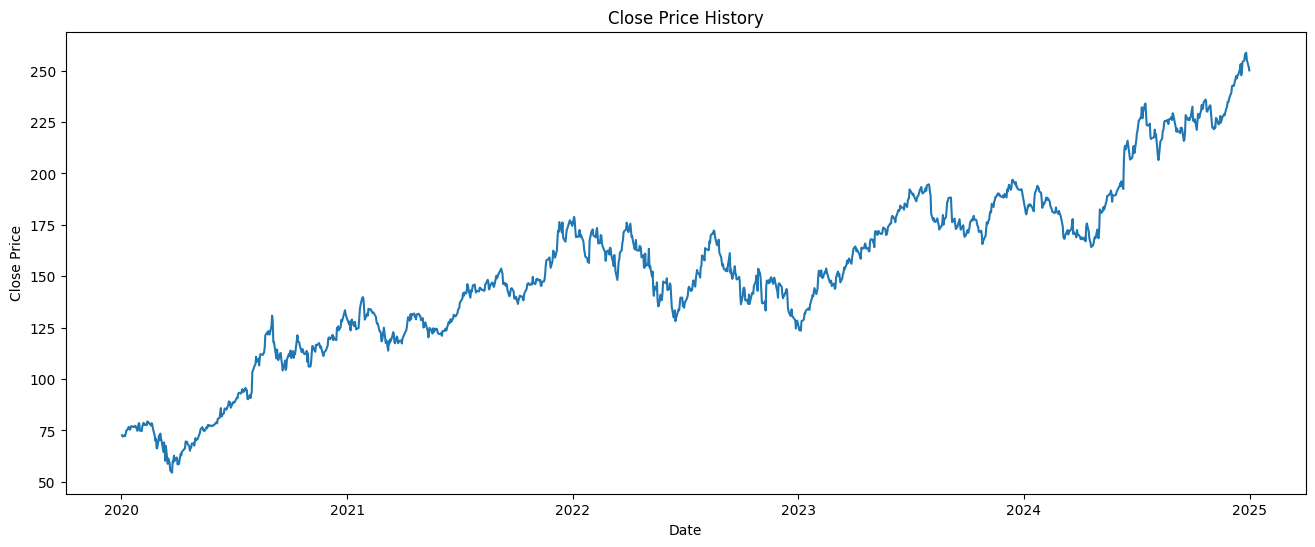

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [ ]:
def log_returns(df):
  log_returns=np.log(1+df['Close'].pct_change())
  log_returns=log_returns[1:]
  return log_returns

Ticker          AAPL
Date                
2024-12-24  0.011413
2024-12-26  0.003171
2024-12-27 -0.013331
2024-12-30 -0.013352
2024-12-31 -0.007083


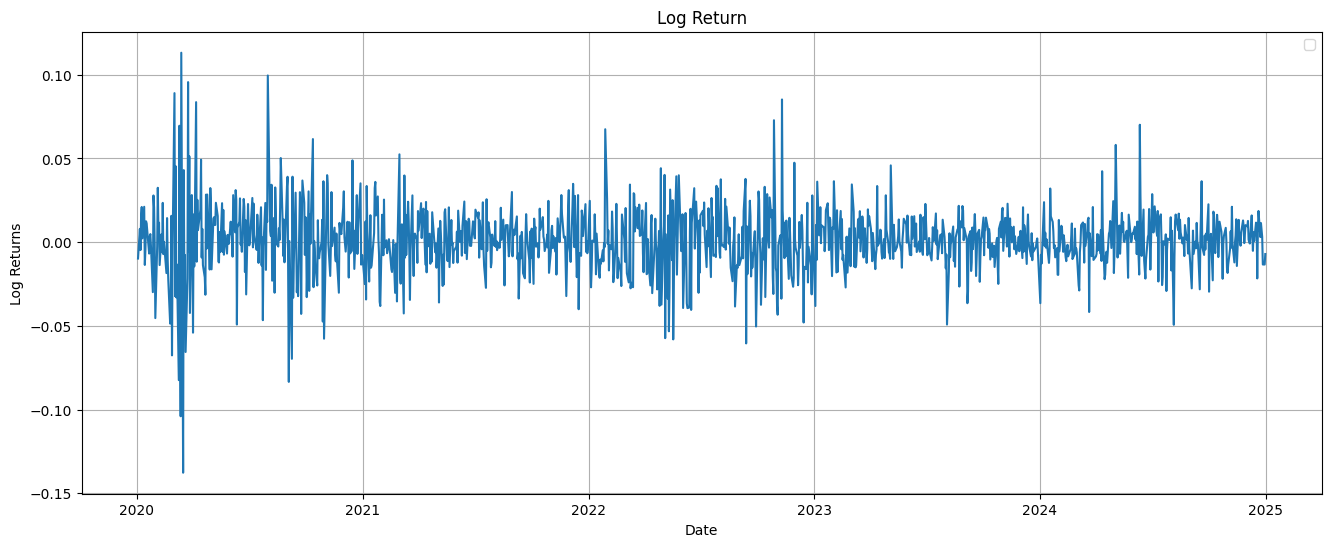

In [ ]:
log_return=log_returns(df)
print(log_return.tail())

plt.figure(figsize=(16,6))
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.plot(log_return)
plt.title('Log Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def calc_vol(lr):
  vol=np.std(lr)
  return vol

daily_vol=calc_vol(log_return)
print(daily_vol)

Ticker
AAPL    0.019932
dtype: float64


## Monte carlo

In [ ]:
simulations=1000
no_of_days_ahead=100
last_price=df['Close'].iloc[-1]

In [ ]:
def run_monte_carlo(simulations,no_of_days_ahead,last_price,log_return):
  daily_vol=calc_vol(log_return)
  all_simulations=[]
  for i in range(simulations):
    price_series=[last_price]
    for j in range(1,no_of_days_ahead):
      price=price_series[-1]*np.exp(np.random.normal(0,daily_vol))
      price_series.append(price)
    all_simulations.append(price_series)
  simulations_df=pd.DataFrame(all_simulations).transpose()
  return simulations_df


In [ ]:
log_return=log_returns(df)
simulations_df=run_monte_carlo(simulations,no_of_days_ahead,last_price,log_return)
simulations_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...,Ticker AAPL 250.144974 Name: 2024-12-31 00:...
1,Ticker AAPL 252.409416 Name: 2024-12-31 00:...,Ticker AAPL 246.453583 Name: 2024-12-31 00:...,Ticker AAPL 240.330388 Name: 2024-12-31 00:...,Ticker AAPL 257.458789 Name: 2024-12-31 00:...,Ticker AAPL 242.806481 Name: 2024-12-31 00:...,Ticker AAPL 252.24973 Name: 2024-12-31 00:0...,Ticker AAPL 249.483011 Name: 2024-12-31 00:...,Ticker AAPL 250.491528 Name: 2024-12-31 00:...,Ticker AAPL 249.787715 Name: 2024-12-31 00:...,Ticker AAPL 250.294574 Name: 2024-12-31 00:...,...,Ticker AAPL 253.790233 Name: 2024-12-31 00:...,Ticker AAPL 261.325434 Name: 2024-12-31 00:...,Ticker AAPL 243.905731 Name: 2024-12-31 00:...,Ticker AAPL 248.175965 Name: 2024-12-31 00:...,Ticker AAPL 244.754457 Name: 2024-12-31 00:...,Ticker AAPL 252.775502 Name: 2024-12-31 00:...,Ticker AAPL 243.021579 Name: 2024-12-31 00:...,Ticker AAPL 246.41841 Name: 2024-12-31 00:0...,Ticker AAPL 244.48389 Name: 2024-12-31 00:0...,Ticker AAPL 243.468121 Name: 2024-12-31 00:...
2,Ticker AAPL 251.925117 Name: 2024-12-31 00:...,Ticker AAPL 243.730467 Name: 2024-12-31 00:...,Ticker AAPL 243.46187 Name: 2024-12-31 00:0...,Ticker AAPL 255.929319 Name: 2024-12-31 00:...,Ticker AAPL 248.615245 Name: 2024-12-31 00:...,Ticker AAPL 256.634243 Name: 2024-12-31 00:...,Ticker AAPL 244.672345 Name: 2024-12-31 00:...,Ticker AAPL 251.617154 Name: 2024-12-31 00:...,Ticker AAPL 248.019632 Name: 2024-12-31 00:...,Ticker AAPL 246.180906 Name: 2024-12-31 00:...,...,Ticker AAPL 250.033428 Name: 2024-12-31 00:...,Ticker AAPL 250.576334 Name: 2024-12-31 00:...,Ticker AAPL 248.967751 Name: 2024-12-31 00:...,Ticker AAPL 249.534267 Name: 2024-12-31 00:...,Ticker AAPL 235.365972 Name: 2024-12-31 00:...,Ticker AAPL 255.895449 Name: 2024-12-31 00:...,Ticker AAPL 245.429654 Name: 2024-12-31 00:...,Ticker AAPL 247.328976 Name: 2024-12-31 00:...,Ticker AAPL 247.756723 Name: 2024-12-31 00:...,Ticker AAPL 246.427977 Name: 2024-12-31 00:...
3,Ticker AAPL 248.528128 Name: 2024-12-31 00:...,Ticker AAPL 240.654214 Name: 2024-12-31 00:...,Ticker AAPL 241.146234 Name: 2024-12-31 00:...,Ticker AAPL 261.762291 Name: 2024-12-31 00:...,Ticker AAPL 249.783186 Name: 2024-12-31 00:...,Ticker AAPL 252.064481 Name: 2024-12-31 00:...,Ticker AAPL 250.302785 Name: 2024-12-31 00:...,Ticker AAPL 251.331152 Name: 2024-12-31 00:...,Ticker AAPL 245.141721 Name: 2024-12-31 00:...,Ticker AAPL 244.192121 Name: 2024-12-31 00:...,...,Ticker AAPL 252.214277 Name: 2024-12-31 00:...,Ticker AAPL 253.698227 Name: 2024-12-31 00:...,Ticker AAPL 248.774058 Name: 2024-12-31 00:...,Ticker AAPL 254.954583 Name: 2024-12-31 00:...,Ticker AAPL 237.414283 Name: 2024-12-31 00:...,Ticker AAPL 248.827795 Name: 2024-12-31 00:...,Ticker AAPL 258.322431 Name: 2024-12-31 00:...,Ticker AAPL 239.820856 Name: 2024-12-31 00:...,Ticker AAPL 240.132023 Name: 2024-12-31 00:...,Ticker AAPL 239.984992 Name: 2024-12-31 00:...
4,Ticker AAPL 252.977814 Name: 2024-12-31 00:...,Ticker AAPL 243.909458 Name: 2024-12-31 00:...,Ticker AAPL 244.996872 Name: 2024-12-31 00:...,Ticker A

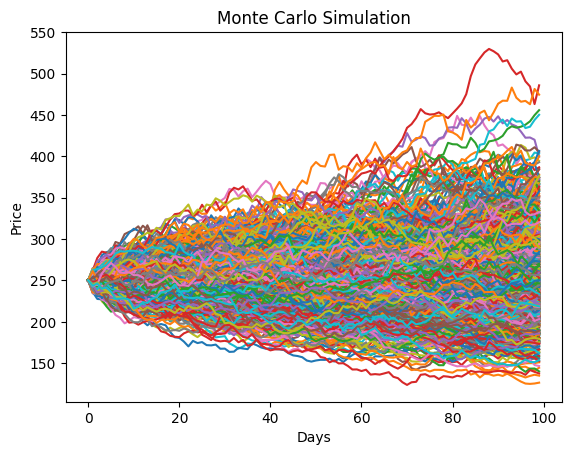

In [ ]:
plt.plot(simulations_df)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation')
plt.show()